# Midiendo rendimiento y riesgo con datos históricos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/7/7d/Copper_Price_History_USD.png" width="600px" height="400px" />

> Ya sabemos que podemos caracterizar la distribución de rendimientos de un activo mediante una medida de tendencia central (media: rendimiento esperado) y una medida de dispersión (desviación estándar: volatilidad). 

> En la clase pasada vimos como obtener reportes históricos de precios de activos. ¿Cómo usamos estos históricos para medir el rendimiento esperado y la volatilidad de los rendimientos?

*Objetivos:*
- Calcular los rendimientos a partir de históricos de precios.
- Estimar rendimiento esperado y riesgo a partir de históricos de rendimientos.
- Anualizar rendimiento y volatilidad cuando los datos están en una base de tiempo menor.
- Verificar la relación entre rendimiento y riesgo a través de datos reales.

**Referencias:**
- http://pandas.pydata.org/
- https://pandas-datareader.readthedocs.io/en/latest/
- Notas del curso "Portfolio Selection and Risk Management", Rice University, disponible en Coursera.
___

## 1. Cálculo de los rendimientos

Muy bien, ya entonces sabemos descargar históricos de precios...

**Ejemplo:** trabajaremos esta clase con activos que se encuentran en el top-10 del índice S&P500. Descargar precios ajustados en el cierre de Microsoft (MSFT), Apple (AAPL), Amazon (AMZN), Facebook (META) y Alphabet Inc. (GOOGL) desde el primero de enero del 2015 hasta hoy.

In [1]:
# Importar paquetes
import pandas_datareader.data as web
import yfinance as yf
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
yf.pdr_override()

In [3]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers,
                   start_date=None,
                   end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.get_data_yahoo(
        tickers=tickers,
        start=start_date,
        end=end_date
    )
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

In [4]:
# Información
tickers = ["MSFT", "AAPL", "AMZN", "META", "GOOGL"]
start_date = "2015-01-01"

In [5]:
# Precios diarios ajustados en el cierre
closes = get_adj_closes(
    tickers=tickers,
    start_date=start_date
)

[*********************100%***********************]  5 of 5 completed


In [6]:
closes.head()

,AAPL,AMZN,GOOGL,META,MSFT
Date,,,,,
2015-01-02 00:00:00-05:00,24.603205,15.4260,26.477501,78.449997,40.811432
2015-01-05 00:00:00-05:00,23.910097,15.1095,25.973000,77.190002,40.436127
2015-01-06 00:00:00-05:00,23.912344,14.7645,25.332001,76.150002,39.842648
2015-01-07 00:00:00-05:00,24.247646,14.9210,25.257500,76.150002,40.348850
2015-01-08 00:00:00-05:00,25.179293,15.0230,25.345501,78.180000,41.535843


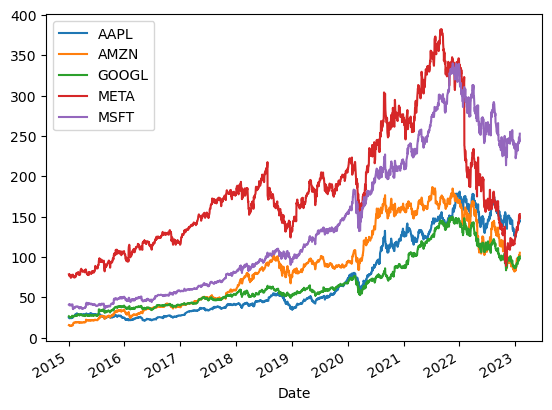

In [7]:
# Gráfico de histórico de precios diarios
closes.plot();

### 1.1. Rendimientos porcentuales

Muy bien, pero para el análisis no trabajamos con los precios sino con los rendimientos... **¿porqué?**

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

*¡Cuidado!* los rendimientos son de acuerdo a la base de tiempo en que se reportan los precios. Por ejemplo: 
- si los precios se reportan en una base diaria, los rendimientos también son diarios;
- si los precios se reportan en una base mensual, los rendimientos también son mensuales.

In [8]:
# S_t
closes.head()

,AAPL,AMZN,GOOGL,META,MSFT
Date,,,,,
2015-01-02 00:00:00-05:00,24.603205,15.4260,26.477501,78.449997,40.811432
2015-01-05 00:00:00-05:00,23.910097,15.1095,25.973000,77.190002,40.436127
2015-01-06 00:00:00-05:00,23.912344,14.7645,25.332001,76.150002,39.842648
2015-01-07 00:00:00-05:00,24.247646,14.9210,25.257500,76.150002,40.348850
2015-01-08 00:00:00-05:00,25.179293,15.0230,25.345501,78.180000,41.535843


In [9]:
# S_{t-1}
closes.shift().head()

,AAPL,AMZN,GOOGL,META,MSFT
Date,,,,,
2015-01-02 00:00:00-05:00,NaN,NaN,NaN,NaN,NaN
2015-01-05 00:00:00-05:00,24.603205,15.4260,26.477501,78.449997,40.811432
2015-01-06 00:00:00-05:00,23.910097,15.1095,25.973000,77.190002,40.436127
2015-01-07 00:00:00-05:00,23.912344,14.7645,25.332001,76.150002,39.842648
2015-01-08 00:00:00-05:00,24.247646,14.9210,25.257500,76.150002,40.348850


In [10]:
# Calcular rendimientos
st = closes
st_1 = closes.shift()
ret = ((st - st_1) / st_1).dropna()

In [11]:
# Una forma equivalente de hacerlo
ret = closes.pct_change().dropna()

In [12]:
ret.tail()

,AAPL,AMZN,GOOGL,META,MSFT
Date,,,,,
2023-01-26 00:00:00-05:00,0.014803,0.020992,0.024155,0.040989,0.030714
2023-01-27 00:00:00-05:00,0.013684,0.030437,0.018971,0.030143,0.000645
2023-01-30 00:00:00-05:00,-0.020078,-0.016530,-0.024454,-0.030842,-0.021962
2023-01-31 00:00:00-05:00,0.009021,0.025659,0.019600,0.012988,0.021013
2023-02-01 00:00:00-05:00,0.007901,0.019587,0.016087,0.027858,0.019935


In [13]:
ret.head()

,AAPL,AMZN,GOOGL,META,MSFT
Date,,,,,
2015-01-05 00:00:00-05:00,-0.028171,-0.020517,-0.019054,-0.016061,-0.009196
2015-01-06 00:00:00-05:00,0.000094,-0.022833,-0.024679,-0.013473,-0.014677
2015-01-07 00:00:00-05:00,0.014022,0.010600,-0.002941,0.000000,0.012705
2015-01-08 00:00:00-05:00,0.038422,0.006836,0.003484,0.026658,0.029418
2015-01-09 00:00:00-05:00,0.001073,-0.011749,-0.012211,-0.005628,-0.008405


`NaN`: Not A Number

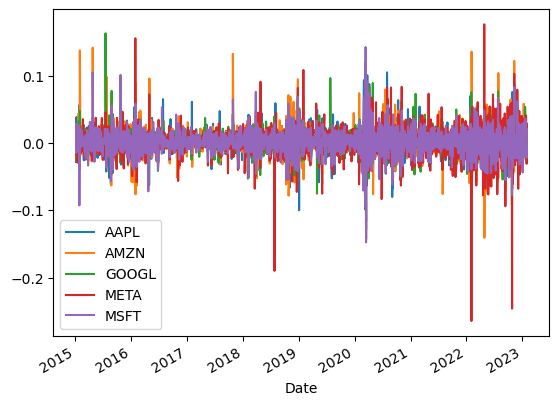

In [14]:
# Graficar...
ret.plot();

**¿Qué se observa respecto a los precios?**

Respuestas:
- Los rendimientos parecen conservar tendecias estadísticas constantes (por ejemplo, oscilan al rededor de números cercanos a cero). 

### 1.2. Rendimientos logarítmicos (log-rendimientos)

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right) = \ln(S_t) - \ln(S_{t-1}).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

<font color=blue>Ver en el tablero</font> que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

In [15]:
%timeit np.log(st).diff()

86.7 µs ± 1.28 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [16]:
%timeit np.log(st / st_1)

130 µs ± 1.57 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [17]:
# Más eficiente
logret = np.log(st).diff().dropna()

In [18]:
logret.head()

,AAPL,AMZN,GOOGL,META,MSFT
Date,,,,,
2015-01-05 00:00:00-05:00,-0.028576,-0.020731,-0.019238,-0.016191,-0.009239
2015-01-06 00:00:00-05:00,0.000094,-0.023098,-0.024989,-0.013565,-0.014786
2015-01-07 00:00:00-05:00,0.013925,0.010544,-0.002945,0.000000,0.012625
2015-01-08 00:00:00-05:00,0.037702,0.006813,0.003478,0.026309,0.028994
2015-01-09 00:00:00-05:00,0.001072,-0.011818,-0.012286,-0.005644,-0.008440


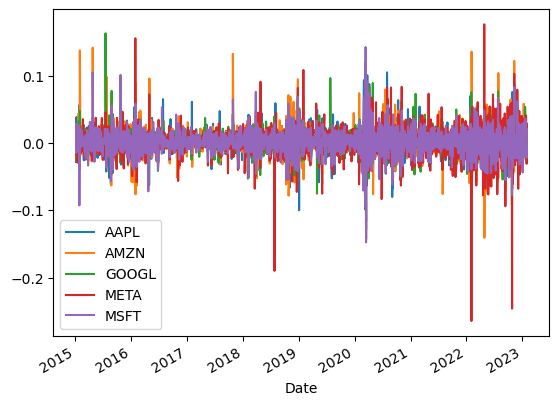

In [19]:
ret.plot();

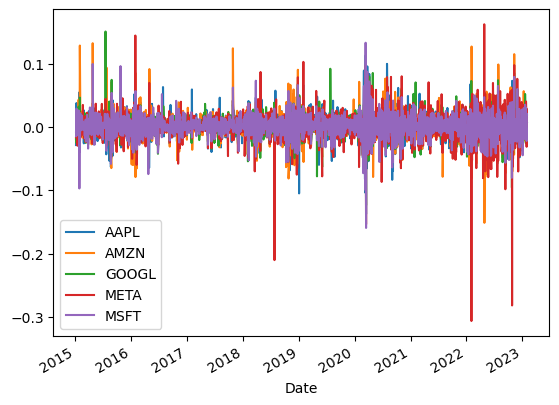

In [20]:
logret.plot();

In [21]:
# Recordar rendimientos porcentuales. Ver que son similares
np.abs(ret - logret)

,AAPL,AMZN,GOOGL,META,MSFT
Date,,,,,
2015-01-05 00:00:00-05:00,4.044286e-04,0.000213,0.000184,0.000130,4.254497e-05
2015-01-06 00:00:00-05:00,4.415001e-09,0.000265,0.000310,0.000092,1.087721e-04
2015-01-07 00:00:00-05:00,9.740082e-05,0.000056,0.000004,0.000000,8.003195e-05
2015-01-08 00:00:00-05:00,7.197518e-04,0.000023,0.000006,0.000349,4.244132e-04
2015-01-09 00:00:00-05:00,5.750185e-07,0.000070,0.000075,0.000016,3.551981e-05
...,...,...,...,...,...
2023-01-26 00:00:00-05:00,1.085004e-04,0.000217,0.000287,0.000818,4.622221e-04
2023-01-27 00:00:00-05:00,9.278397e-05,0.000454,0.000178,0.000445,2.080366e-07
2023-01-30 00:00:00-05:00,2.043038e-04,0.000138,0.000304,0.000486,2.447465e-04


Por lo anterior, muchas veces se usan para el análisis los rendimientos continuamente compuestos.
___

## 2. Caracterización de la distribución de los rendimientos

Entonces:
- partimos de que tenemos los rendimientos porcentuales diarios de Microsoft (MSFT), Apple (AAPL), Amazon (AMZN), Facebook (FB) y Alphabet Inc. (GOOGL) desde inicios del 2011 a finales del 2015;
- ¿cómo resumirían estos datos?

In [22]:
# Rendimiento medio diario (media aritmética)
ret.mean()

AAPL     0.001051
AMZN     0.001163
GOOGL    0.000814
META     0.000611
MSFT     0.001054
dtype: float64

In [23]:
# Volatilidad diaria (desviación estándar)
ret.std()

AAPL     0.018839
AMZN     0.021012
GOOGL    0.017852
META     0.023460
MSFT     0.017758
dtype: float64

In [24]:
# Podemos resumir en un DataFrame
summary_daily = pd.DataFrame({
    "mean": ret.mean(),
    "vol": ret.std()
}).T
summary_daily

,AAPL,AMZN,GOOGL,META,MSFT
mean,0.001051,0.001163,0.000814,0.000611,0.001054
vol,0.018839,0.021012,0.017852,0.023460,0.017758


Normalmente se reportan rendimientos esperados y volatilidades en una base anual. Para anualizar:

$$E[r_a]=12E[r_m]=252E[r_d]=52E[r_w],\text{ y}$$

$$\sigma_{r_a}=\sqrt{12}\sigma_{r_m}=\sqrt{252}\sigma_{r_d}=\sqrt{52}\sigma_{r_w}$$

In [25]:
# Resumen en base anual
summary_annual = pd.DataFrame({
    "media": ret.mean() * 252,
    "vol": ret.std() * (252)**0.5
}).T

In [26]:
summary_annual

,AAPL,AMZN,GOOGL,META,MSFT
media,0.264956,0.293189,0.205238,0.153975,0.265713
vol,0.299060,0.333553,0.283400,0.372422,0.281896


In [27]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Rendimiento esperado')

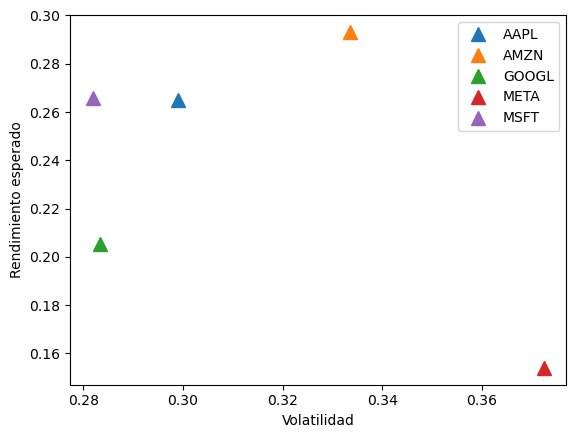

In [28]:
# Gráfico rendimiento esperado vs. volatilidad
for col in summary_annual:
    plt.plot(
        summary_annual.loc["vol", col],
        summary_annual.loc["media", col],
        "^",
        ms=10,
        label=col
    )
plt.legend()
plt.xlabel("Volatilidad")
plt.ylabel("Rendimiento esperado")

### 2.1 Ajuste de curvas con mínimos cuadrados
Consideramos que tenemos un conjunto de n pares ordenados de datos $(\sigma_{r_i},E[r_i])$, para $i=1,2,3,\dots,n$... **en este caso corresponden a volatilidad y rendimiento esperado**

#### ¿Cuál es la recta que mejor se ajusta a estos datos?
Consideramos entonces ajustes de la forma $\hat{f}(\sigma) = \beta_0+\beta_1 \sigma = \left[1 \quad \sigma\right]\left[\begin{array}{c} \beta_0 \\ \beta_1 \end{array}\right]=\left[1 \quad \sigma\right]\boldsymbol{\beta}$ (lineas rectas).

Para decir '*mejor*', tenemos que definir algún sentido en que una recta se ajuste *mejor* que otra.

**Mínimos cuadrados**: el objetivo es seleccionar los coeficientes $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$, de forma que la función evaluada en los puntos $\sigma_{r_i}$ ($\hat{f}(\sigma_{r_i})$) aproxime los valores correspondientes $E[r_i]$.

La formulación por mínimos cuadrados, encuentra los $\boldsymbol{\beta}=\left[\beta_0 \quad \beta_1 \right]^T$ que minimiza
$$\sum_{i=1}^{n}(E[r_i]-\hat{f}(\sigma_{r_i}))^2$$

In [29]:
# Importar el módulo LinearRegression del modulo linear_model de la librería sklearn
from sklearn.linear_model import LinearRegression

In [30]:
help(LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |  
 |  normalize : bool, default=False
 |      This parameter is ignored when ``fit_intercept`` is set to False.
 |      If True, the regressors X will be normalized before regression by
 |    

In [31]:
# Instanciamos la regresión lineal
model = LinearRegression()

In [37]:
summary_annual.loc["vol"].values

array([0.29906046, 0.33355261, 0.28339953, 0.372422  , 0.28189637])

In [39]:
summary_annual.loc["vol"].values.reshape(-1, 1)

array([[0.29906046],
       [0.33355261],
       [0.28339953],
       [0.372422  ],
       [0.28189637]])

In [36]:
# Resolver problema de optimizacion
model.fit(
    X=summary_annual.loc["vol"].values.reshape(-1, 1),
    y=summary_annual.loc["media"].values
)

LinearRegression()

In [40]:
b0 = model.intercept_
b1 = model.coef_
b0, b1

(0.4527492941937573, array([-0.68818271]))

In [41]:
# Cálculo de bondad de ajuste através de R^2
model.score(
    X=summary_annual.loc["vol"].values.reshape(-1, 1),
    y=summary_annual.loc["media"].values
)

0.22383901032998077

Text(0, 0.5, 'Rendimiento esperado')

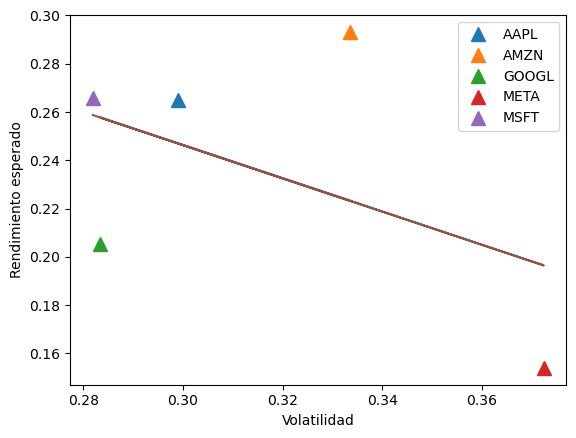

In [43]:
for col in summary_annual:
    plt.plot(
        summary_annual.loc["vol", col],
        summary_annual.loc["media", col],
        "^",
        ms=10,
        label=col
    )
# Gráfico de la recta
plt.plot(
    summary_annual.loc["vol"].values,
    model.predict(summary_annual.loc["vol"].values.reshape(-1, 1)),
)
plt.legend()
plt.xlabel("Volatilidad")
plt.ylabel("Rendimiento esperado")

# Sacando a META del análisis

In [45]:
summary_annual

,AAPL,AMZN,GOOGL,META,MSFT
media,0.264956,0.293189,0.205238,0.153975,0.265713
vol,0.299060,0.333553,0.283400,0.372422,0.281896


In [46]:
summary_annual.loc["vol"].drop("META")

AAPL     0.299060
AMZN     0.333553
GOOGL    0.283400
MSFT     0.281896
Name: vol, dtype: float64

In [49]:
model = LinearRegression().fit(
    X=summary_annual.loc["vol"].drop("META").values.reshape(-1, 1),
    y=summary_annual.loc["media"].drop("META").values
)
b0 = model.intercept_
b1 = model.coef_
b0, b1

(-0.07337919800163051, array([1.10410156]))

In [53]:
model.score(
    X=summary_annual.loc["vol"].values.reshape(-1, 1),
    y=summary_annual.loc["media"].values
)

-1.8281274414524993

El punto relativo a META, hace que la varianza explicada sea pésima.

In [51]:
model.score(
    X=summary_annual.loc["vol"].drop("META").values.reshape(-1, 1),
    y=summary_annual.loc["media"].drop("META").values
)

0.5105771914692674

Text(0, 0.5, 'Rendimiento esperado')

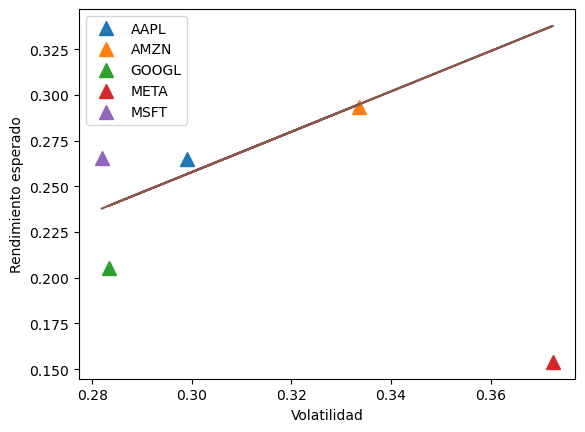

In [52]:
for col in summary_annual:
    plt.plot(
        summary_annual.loc["vol", col],
        summary_annual.loc["media", col],
        "^",
        ms=10,
        label=col
    )
# Gráfico de la recta
plt.plot(
    summary_annual.loc["vol"].values,
    model.predict(summary_annual.loc["vol"].values.reshape(-1, 1)),
)
plt.legend()
plt.xlabel("Volatilidad")
plt.ylabel("Rendimiento esperado")

In [54]:
b0, b1

(-0.07337919800163051, array([1.10410156]))

**¿Qué se puede concluir acerca de la relación entre riesgo (medido con la volatilidad) y el rendimiento esperado (medido con la media)?**

Respuestas:
- La pendiente de la recta es positiva, lo que confirma la relación positiva entre rendimiento esperado y riesgo.
- Si el mercado solo estuviera dado por los cuatro activos analizados (GOOGL, MSFT, AAPL, AMZN), la tasa libre de riesgo sería $-0.07$.
- Por cada unidad de riesgo (volatilidad), el rendimiento esperado aumenta $1.1$.

## 3. Comentarios finales acerca del uso de datos históricos.

### ¡Cuidado!
- Es cierto que los patrones que vemos sobre periodos largos de tiempo en diferentes tipos de intrumentos son muy robustos en términos de la relación rendimiento/riesgo (positiva).
- Por tanto, esperamos rendimientos más altos en el futuro cuando asumimos cierto riesgo.
- ¿Cómo encontramos ese 'rendimiento esperado'? Datos históricos (humanos: tendencia a generalizar)

- Entonces, la idea es que si los rendimientos esperados son un p.e. estacionario, el promedio de muchos rendimientos pasados es una buena estimación del rendimiento esperado futuro (Teorema del límite central).
- ¿Deberíamos pensarlo dos veces?

## SI

Problemas:
- La muestra de datos en el periodo específico de tiempo puede estar sesgada.
- Ventanas de tiempo más grandes reducen especificidad de la muestra y estimados más precisos.
 - Aún así, datos muy viejos pueden ser no representativos.
- Nuevos fondos o estrategias de inversión están a menudo sesgados positivamente:
 - reporte de resultados en tiempos voluntarios;
 - las que mueren (no funcionan), no se reportan;

# Anuncios parroquiales:
## 1. Fin Módulo 1. Revisar que se hayan cumplido los objetivos del módulo (Clase0)
## 2. Tarea: revisar archivo "Tarea3_MidiendoRendimientoRiesgo" en clase. Para el viernes 10 de febrero.

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Esteban Jiménez Rodríguez.
</footer>